In [7]:
#Importing libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #used for scaling each feature to a given range
from keras.models import Sequential #sequential-plain stack of layers
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
plt.style.use('dark_background')

In [8]:
#Uploading the dataset
df = pd.read_excel('dataset.xlsx')
df.head()

,DATE,VALUES
0,1972-08-22,0.2673
1,1972-08-23,0.2703
2,1972-08-24,0.2706
3,1972-08-25,0.2722
4,1972-08-28,0.2704


In [9]:
#Date column is formatted and set as index
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('DATE')

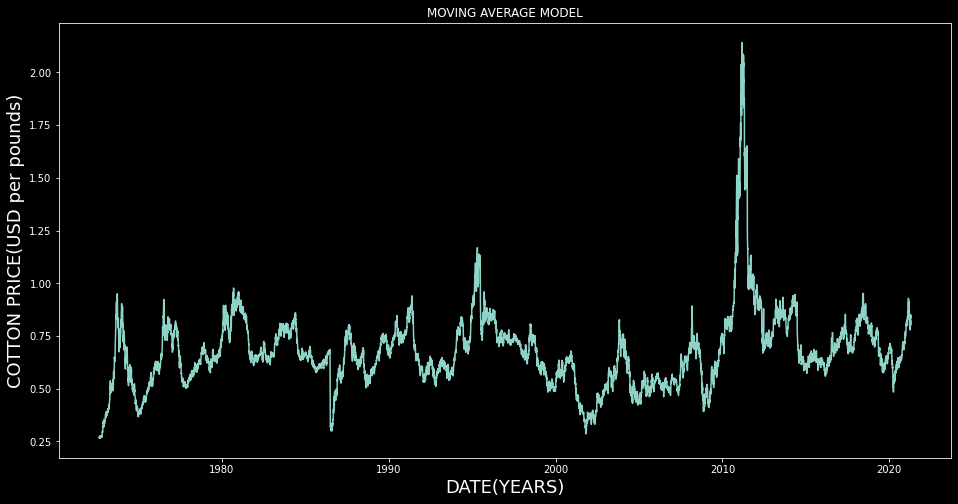

In [10]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('VISUALISATION')
plt.plot(df['VALUES'])
plt.title('MOVING AVERAGE MODEL')
plt.xlabel('DATE(YEARS)',fontsize=18)
plt.ylabel('COTTON PRICE(USD per pounds)',fontsize=18)
plt.show()

In [11]:
#Splitting train and test set
train = df[:9744]
valid = df[9744:]

In [12]:
#Prediction using moving average
preds = []
for i in range(0,valid.shape[0]):
    a = train['VALUES'][len(train)-2474+i:].sum() + sum(preds)
    b = a/2474
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['VALUES'])-preds),2)))
print("****Moving Average****")
print('\n RMSE value on validation set:')
print(rms)

****Moving Average****

 RMSE value on validation set:
0.14402101485257765


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'COTTON PRICE(USD per pounds)')

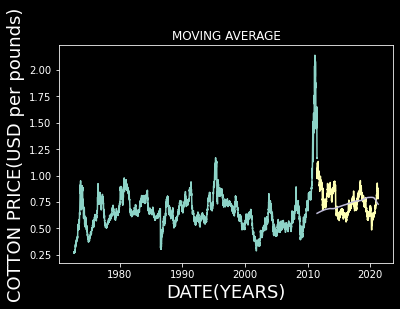

In [13]:
#Plotting the predicted values
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['VALUES'])
plt.plot(valid[['VALUES', 'Predictions']])
plt.title('MOVING AVERAGE')
plt.xlabel('DATE(YEARS)',fontsize=18)
plt.ylabel('COTTON PRICE(USD per pounds)',fontsize=18)
